In [59]:
import pandas as pd
df = pd.read_csv('dane_wiki_final.csv')
df.info()
# errors in this row - looks like sentence is cut to one word only, list has length 1
df = df.drop(index=1528)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439 entries, 0 to 2438
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            2439 non-null   int64 
 1   term                  2439 non-null   object
 2   response_gpt3         2439 non-null   object
 3   pos_gpt3              2439 non-null   object
 4   response_gpt4         2439 non-null   object
 5   pos_gpt4              2439 non-null   object
 6   wiki_response_gpt3    2439 non-null   object
 7   wiki_pos_gpt3         2439 non-null   object
 8   wiki_response_gpt4    2439 non-null   object
 9   wiki_pos_gpt4         2439 non-null   object
 10  response_orca         2439 non-null   object
 11  pos_orca              2439 non-null   object
 12  wiki_response_orca    2439 non-null   object
 13  wiki_pos_orca         2439 non-null   object
 14  prompt                2439 non-null   object
 15  response_falcon       2439 non-null   

In [60]:
#text_columns = ["response_gpt3",  "wiki_response_gpt3", "response_gpt4", "wiki_response_gpt4", "response_orca", "wiki_response_orca",
#               "response_falcon", "wiki_response_falcon", "response_llama", "wiki_response_llama", "response_llama3", 
#               "wiki_response_llama3", "wiki_text_y", "sumy", "bart_sum", "text", "wiki_text", "ts_sum", "gensim_sum"]
text_columns = ["response_gpt3",  "wiki_response_gpt3", "response_gpt4", "wiki_response_gpt4", "response_orca", "wiki_response_orca",
               "response_falcon", "wiki_response_falcon", "response_llama", "wiki_response_llama", "response_llama3", 
               "wiki_response_llama3", "wiki_text_y", "bart_sum", "gensim_sum"]

MAL

Paragraph - Sentence - Word - Syllable - Phoneme

In [61]:
from helpers.TextManipulations import split_text_into_sentences
from helpers.TextManipulations import perform_text_preprocessing
from algorithms.MAL.MAL import create_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import perform_word_split
from algorithms.MAL.MAL import create_words_length_in_sentence_dict
from algorithms.MAL.MAL import count_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict_single
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import print_sorted
from algorithms.MAL.MAL import perform_syllable_split
from algorithms.MAL.MAL import create_words_length_in_sentence_dict
from algorithms.MAL.MAL import count_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict_single
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import perform_phoneme_split
from algorithms.MAL.MAL import count_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict_single
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import find_A_b_numerically



def perform_mal(paragraphs)-> float:
    #print("Paragraphs")
    #print(paragraphs)
    sentences = [split_text_into_sentences(element) for element in paragraphs]
    #print("Sentences")
    #print(sentences)
    sentences_normalized = [[perform_text_preprocessing(string) for string in inner_list] for inner_list in sentences]
    #print("Sentences Normalized")
    #print(sentences_normalized)
    sentences_dict = create_sentences_length_in_paragraph_dict(sentences_normalized)
    #print("Sentences Dict")
    #print(sentences_dict)
    sentences_dict_split = perform_word_split(sentences_dict)
    #print("sentences_dict_split")
    #print(sentences_dict_split)
    words_dict = create_words_length_in_sentence_dict(sentences_dict_split)
    words_dict.pop(0, None) # remove sentence of length zero if encountered
    #print("words_dict")
    #print(words_dict)
    sentences_dict_split_counted = count_sentences_length_in_paragraph_dict(sentences_dict_split) 
    #print("sentences_dict_split_counted")
    #print(sentences_dict_split_counted)
    sentences_dict_split_counted_average_single = average_sentences_length_in_paragraph_dict_single(sentences_dict_split_counted) 

    # Level 1: Paragraph - Sentence - Word (X_1, Y_1)
    X_1_Y_1 = average_sentences_length_in_paragraph_dict(sentences_dict_split_counted_average_single) 
    # print_sorted(X_1_Y_1)
    # Level 2: Sentence - Word - Syllable (X_2, Y_2)
    words_dict_split = perform_syllable_split(words_dict)
    syllables_dict = create_words_length_in_sentence_dict(words_dict_split) 
    words_dict_split_counted = count_sentences_length_in_paragraph_dict(words_dict_split) 
    words_dict_split_counted_average_single = average_sentences_length_in_paragraph_dict_single(words_dict_split_counted) 
    X_2_Y_2 = average_sentences_length_in_paragraph_dict(words_dict_split_counted_average_single) 
    # print_sorted(X_2_Y_2)
    syllables_dict_split = perform_phoneme_split(syllables_dict)
    syllables_dict_split_counted = count_sentences_length_in_paragraph_dict(syllables_dict_split) 

    # Level 3: Word - Syllable - Phoneme (X_3, Y_3)
    syllables_dict_split_counted_average_single = average_sentences_length_in_paragraph_dict_single(syllables_dict_split_counted) 
    X_3_Y_3 = average_sentences_length_in_paragraph_dict(syllables_dict_split_counted_average_single) 
    #print_sorted(X_3_Y_3)

    a_1, b_1 = find_A_b_numerically(X_1_Y_1)
    #print(b_1)
    a_2, b_2 = find_A_b_numerically(X_2_Y_2)
    #print(b_2)
    a_3, b_3 = find_A_b_numerically(X_3_Y_3)
    #print(b_3)

    D = 3 / (b_1 + b_2 + b_3)
    return D

In [62]:
D_s = [perform_mal(df[column].astype(str).values.flatten().tolist()) for column in text_columns]
print(D_s)

[6.404149562220613, 5.97723972801625, 4.732852423852486, 4.042234635018522, 5.19724040096357, 6.720468166132927, 5.7493834579133045, 4.3763404099369385, 5.544868109308323, 4.989899814063494, 6.756468476993267, 6.546958812586344, 11.798654355455861, 3.1053897981508922, 12.112847523981243]


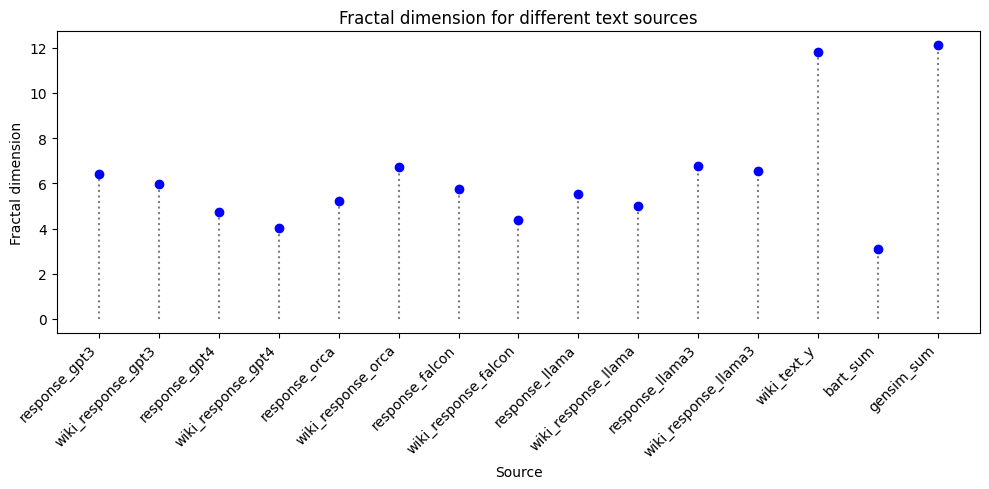

In [63]:
import matplotlib.pyplot as plt

def plot_scatter(D_s, text_coulmns, title, algorithm):
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(D_s)), D_s, color='blue', zorder=5)

    plt.xticks(range(len(text_coulmns)), text_coulmns, rotation=45, ha="right")

    plt.xlabel('Source')
    plt.ylabel('Fractal dimension')
    plt.title(title)
    
    for i, label in enumerate(text_coulmns):
        plt.vlines(i, ymin=0, ymax=D_s[i], colors='gray', linestyles='dotted')

    plt.tight_layout()
    plt.savefig(f'dane_wiki_final_{algorithm}.png')
    plt.show()

plot_scatter(D_s, text_columns, 'Fractal dimension for different text sources', 'MAL')

Data with pos to list transformation

In [64]:
#pos_columns = ["pos_gpt3", "wiki_pos_gpt3", "pos_gpt4", "wiki_pos_gpt4", "pos_orca", "wiki_pos_orca", "pos_falcon",
#               "wiki_pos_falcon", "pos_llama", "wiki_pos_llama", "pos_llama3", "wiki_pos_llama3", "text_pos", "sumy_pos",
#              "bart_pos", "ts_pos", "gensim_pos"]

pos_columns = ["pos_gpt3", "wiki_pos_gpt3", "pos_gpt4", "wiki_pos_gpt4", "pos_orca", "wiki_pos_orca", "pos_falcon",
               "wiki_pos_falcon", "pos_llama", "wiki_pos_llama", "pos_llama3", "wiki_pos_llama3", "text_pos",
              "bart_pos", "gensim_pos"]

dict_pos_to_response = {
    "pos_gpt3": "response_gpt3",
    "wiki_pos_gpt3": "wiki_response_gpt3",
    "pos_gpt4":"response_gpt4",
    "wiki_pos_gpt4":"wiki_response_gpt4",
    "pos_orca":"response_orca",
    "wiki_pos_orca":"wiki_response_orca",
    "pos_falcon":"response_falcon",
    "wiki_pos_falcon":"wiki_response_falcon",
    "pos_llama":"response_llama",
    "wiki_pos_llama":"wiki_response_llama",
    "pos_llama3":"response_llama3",
    "wiki_pos_llama3":"wiki_response_llama3",
    "text_pos":"text",
    "bart_pos":"bart_sum",
    "gensim_pos":"gensim_sum"
}

pos_df = df[pos_columns]
pos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pos_gpt3         2438 non-null   object
 1   wiki_pos_gpt3    2438 non-null   object
 2   pos_gpt4         2438 non-null   object
 3   wiki_pos_gpt4    2438 non-null   object
 4   pos_orca         2438 non-null   object
 5   wiki_pos_orca    2438 non-null   object
 6   pos_falcon       2438 non-null   object
 7   wiki_pos_falcon  2438 non-null   object
 8   pos_llama        2438 non-null   object
 9   wiki_pos_llama   2438 non-null   object
 10  pos_llama3       2438 non-null   object
 11  wiki_pos_llama3  2438 non-null   object
 12  text_pos         2438 non-null   object
 13  bart_pos         2438 non-null   object
 14  gensim_pos       2438 non-null   object
dtypes: object(15)
memory usage: 304.8+ KB


In [65]:
import ast

# util function to convert list in a cell to python list
def convert_to_list(cell):
    try:
        return ast.literal_eval(cell)
    except (ValueError, SyntaxError):
        return cell

pos_df_list = pos_df.applymap(convert_to_list) 
pos_df_list.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pos_gpt3         2438 non-null   object
 1   wiki_pos_gpt3    2438 non-null   object
 2   pos_gpt4         2438 non-null   object
 3   wiki_pos_gpt4    2438 non-null   object
 4   pos_orca         2438 non-null   object
 5   wiki_pos_orca    2438 non-null   object
 6   pos_falcon       2438 non-null   object
 7   wiki_pos_falcon  2438 non-null   object
 8   pos_llama        2438 non-null   object
 9   wiki_pos_llama   2438 non-null   object
 10  pos_llama3       2438 non-null   object
 11  wiki_pos_llama3  2438 non-null   object
 12  text_pos         2438 non-null   object
 13  bart_pos         2438 non-null   object
 14  gensim_pos       2438 non-null   object
dtypes: object(15)
memory usage: 304.8+ KB


Utility functions

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

def box_plot(df, algorithm):
    plt.figure(figsize=(17, 12))
    df.boxplot()
    plt.title(f'Hurst exponent for different text sources calculated using {algorithm}')
    plt.xlabel('Source')
    plt.ylabel('Hurst exponent')
    plt.xticks(rotation=45)  # Rotate column labels if needed
    plt.savefig(f'Box_plot_{algorithm}.png')
    plt.show()

In [67]:
import numpy as np

def find_outliers(df, bound_limit):
    outliers_dict = {}
    median_dict = {}
    for col in df.columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - bound_limit * IQR
        upper_bound = Q3 + bound_limit * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outliers_dict[col] = outliers
    return outliers_dict

In [68]:
def print_outliers(df, outliers):
    for col, outlier_indices in outliers.items():
        print(f"Column {col} outlier indices: {outlier_indices}")
        print(f"Column {col} outlier values pos: {df[col][outlier_indices].tolist()}")
        print(f"Column {col} outlier values text: {df[dict_pos_to_response.get(col)][outlier_indices].tolist()}")

DFA (each cell separately)

In [69]:
from helpers.TimeSeries import construct_its
from algorithms.DFA.DFA import perform_dfa

def dfa_calculate_cell(cell, ranges):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    its = construct_its(cell)
    estimated_h = perform_dfa(its, ranges)
    return estimated_h

In [70]:
import os

h_df_filename_dfa = 'h_df_dfa.csv'

def load_or_create_h_df_filename_dfa(pos_df_list):
    if os.path.exists(h_df_filename_dfa):
        h_df = pd.read_csv(h_df_filename_dfa)
    else:
        h_df = pos_df_list.applymap(lambda x: dfa_calculate_cell(x, [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140]))   
        h_df.to_csv(h_df_filename_dfa, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [71]:
h_df_dfa = load_or_create_h_df_filename_dfa(pos_df_list)
h_df_dfa.info()
h_df_dfa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         2438 non-null   float64
 1   wiki_pos_gpt3    2438 non-null   float64
 2   pos_gpt4         2438 non-null   float64
 3   wiki_pos_gpt4    2438 non-null   float64
 4   pos_orca         2438 non-null   float64
 5   wiki_pos_orca    2438 non-null   float64
 6   pos_falcon       2438 non-null   float64
 7   wiki_pos_falcon  2438 non-null   float64
 8   pos_llama        2438 non-null   float64
 9   wiki_pos_llama   2438 non-null   float64
 10  pos_llama3       2438 non-null   float64
 11  wiki_pos_llama3  2438 non-null   float64
 12  text_pos         2438 non-null   float64
 13  bart_pos         2438 non-null   float64
 14  gensim_pos       2418 non-null   float64
dtypes: float64(15)
memory usage: 285.8 KB


,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,bart_pos,gensim_pos
0,0.354021,0.633284,0.635437,0.491603,0.240059,0.110751,0.355088,0.331124,0.179232,0.179254,0.359906,0.404237,0.866769,7.873645e-31,5.686829e-01
1,0.089048,0.402495,0.347049,0.341977,0.281893,0.305777,0.688693,0.602627,0.510504,0.496236,0.154053,0.398055,0.112927,2.433672e-30,7.873645e-31
2,0.680489,0.231595,0.194552,0.600395,0.223089,0.057093,0.557703,0.403434,0.214064,0.238019,0.247006,0.557842,0.751765,5.967012e-01,7.626991e-01
3,0.352236,0.308869,0.292583,0.422600,0.251151,0.261956,0.282820,0.193660,0.515337,0.325556,0.311325,0.364961,0.625865,-7.873645e-31,3.752532e-01
4,0.362998,0.237564,0.286208,0.361953,0.670626,0.690680,0.102260,0.393400,0.659647,0.057493,0.214821,0.452594,0.761817,-7.873645e-31,NaN


In [72]:
outliers = find_outliers(h_df_dfa, 3)
print_outliers(df, outliers)

Column pos_gpt3 outlier indices: []
Column pos_gpt3 outlier values pos: []
Column pos_gpt3 outlier values text: []
Column wiki_pos_gpt3 outlier indices: [1466]
Column wiki_pos_gpt3 outlier values pos: ['[1, 14, 1, 9, 4, 7, 1, 9, 12, 4, 17, 2, 7, 1, 14, 1, 1, 9, 14, 2, 7, 1, 9, 17, 10, 9, 14, 12, 4, 3, 17, 2, 12, 1, 6, 1, 9, 2, 2, 7, 9, 2, 1, 9, 14, 2, 7, 9, 14, 7, 9, 6, 9, 9, 4, 9, 14, 1, 14, 6, 7, 9, 17, 2, 9, 13, 14, 13, 13, 14, 13, 14, 13, 13, 14, 12, 13, 14, 9, 13, 14, 6, 13, 13, 14, 1, 9, 4, 17, 7, 3, 1, 9, 2, 2, 7, 9, 2, 12, 1, 9, 6, 7, 9, 2, 17, 1, 17, 6, 3, 17, 9, 2, 1, 1, 9, 14, 3, 14, 12, 4, 3, 17, 2, 1, 9, 9, 14, 3, 2, 9, 2, 7, 1, 9, 14, 9, 14, 1, 9, 4, 3, 17, 2, 7, 9, 12, 17, 9, 2, 9, 14, 9, 14, 6, 9, 14, 12, 4, 17, 2, 9, 11, 17, 9, 12, 17, 7, 9, 2, 9, 6, 1, 9, 14, 3, 14, 1, 14, 1, 9, 17, 7, 1, 9, 2, 7, 9, 2, 9, 2, 2, 12, 1, 1, 9, 6, 1, 9, 14]']
Column wiki_pos_gpt3 outlier values text: ['D-flat major is a musical key that is based on the D-flat major scale, with a key sign

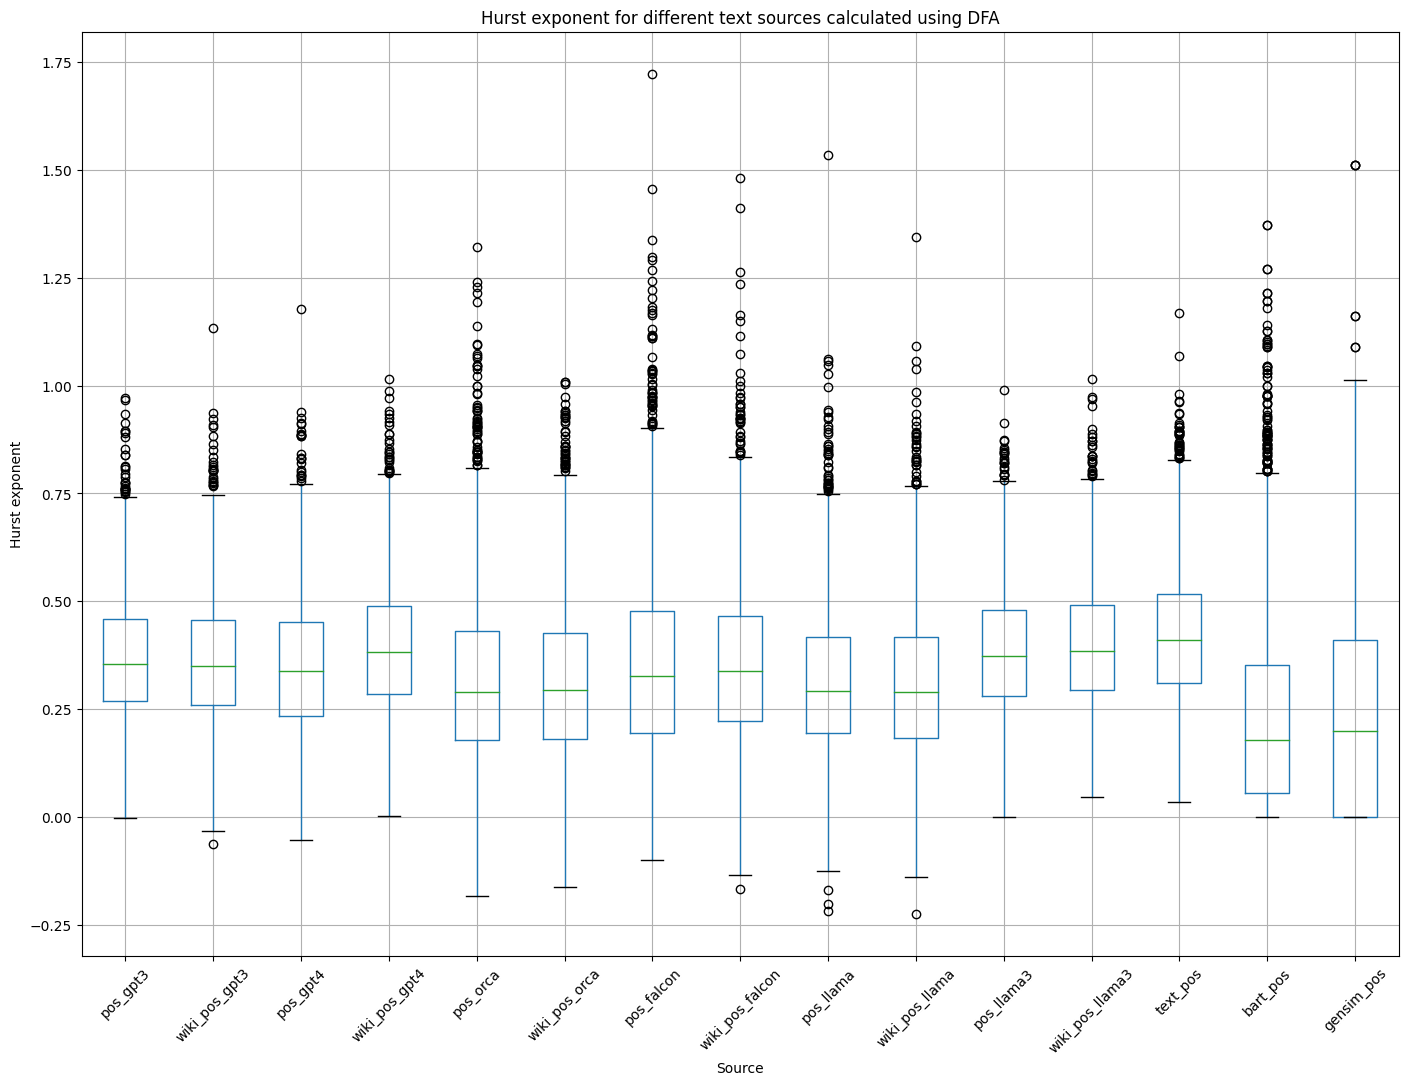

In [73]:
box_plot(h_df_dfa, 'DFA')

AFA

In [74]:
from helpers.TimeSeries import construct_its
from algorithms.AFA.AFA import perform_afa

def afa_calculate_cell(cell, ranges):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    its = construct_its(cell)
    estimated_h = perform_afa(its, ranges)
    return estimated_h

In [75]:
import os

h_df_filename_afa = 'h_df_afa.csv'

def load_or_create_h_df_filename_afa(pos_df_list):
    if os.path.exists(h_df_filename_afa):
        h_df = pd.read_csv(h_df_filename_afa)
    else:
        h_df = pos_df_list.applymap(lambda x: afa_calculate_cell(x, [60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140]))    
        h_df.to_csv(h_df_filename_afa, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [76]:
h_df_afa = load_or_create_h_df_filename_afa(pos_df_list)
h_df_afa.info()
h_df_afa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         2437 non-null   float64
 1   wiki_pos_gpt3    2435 non-null   float64
 2   pos_gpt4         2395 non-null   float64
 3   wiki_pos_gpt4    2436 non-null   float64
 4   pos_orca         1350 non-null   float64
 5   wiki_pos_orca    1901 non-null   float64
 6   pos_falcon       834 non-null    float64
 7   wiki_pos_falcon  1708 non-null   float64
 8   pos_llama        1774 non-null   float64
 9   wiki_pos_llama   2016 non-null   float64
 10  pos_llama3       2434 non-null   float64
 11  wiki_pos_llama3  2437 non-null   float64
 12  text_pos         2411 non-null   float64
 13  bart_pos         0 non-null      float64
 14  gensim_pos       141 non-null    float64
dtypes: float64(15)
memory usage: 285.8 KB


,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,bart_pos,gensim_pos
0,0.532546,0.436250,0.303871,0.429700,0.221353,0.580974,NaN,NaN,NaN,0.178265,0.479785,0.659370,0.472562,NaN,0.603071
1,0.453310,0.266022,0.681012,0.123882,0.541234,0.199980,NaN,0.214876,0.683604,0.235590,0.283342,0.193900,0.445512,NaN,NaN
2,0.437601,0.293770,0.223493,0.271244,0.270893,0.956700,NaN,0.259215,0.366218,0.591632,0.282778,0.466844,0.553673,NaN,NaN
3,0.347214,0.467346,0.541094,0.194443,0.266935,0.441445,NaN,0.644732,0.765492,0.112851,0.171658,0.227843,0.463460,NaN,NaN
4,0.260626,0.199304,NaN,0.396392,NaN,0.279146,NaN,NaN,NaN,0.303460,0.227014,0.856329,NaN,NaN,NaN


In [77]:
outliers = find_outliers(h_df_afa, 1.5)
print_outliers(df, outliers)

Column pos_gpt3 outlier indices: []
Column pos_gpt3 outlier values pos: []
Column pos_gpt3 outlier values text: []
Column wiki_pos_gpt3 outlier indices: []
Column wiki_pos_gpt3 outlier values pos: []
Column wiki_pos_gpt3 outlier values text: []
Column pos_gpt4 outlier indices: []
Column pos_gpt4 outlier values pos: []
Column pos_gpt4 outlier values text: []
Column wiki_pos_gpt4 outlier indices: []
Column wiki_pos_gpt4 outlier values pos: []
Column wiki_pos_gpt4 outlier values text: []
Column pos_orca outlier indices: []
Column pos_orca outlier values pos: []
Column pos_orca outlier values text: []
Column wiki_pos_orca outlier indices: []
Column wiki_pos_orca outlier values pos: []
Column wiki_pos_orca outlier values text: []
Column pos_falcon outlier indices: []
Column pos_falcon outlier values pos: []
Column pos_falcon outlier values text: []
Column wiki_pos_falcon outlier indices: []
Column wiki_pos_falcon outlier values pos: []
Column wiki_pos_falcon outlier values text: []
Column p

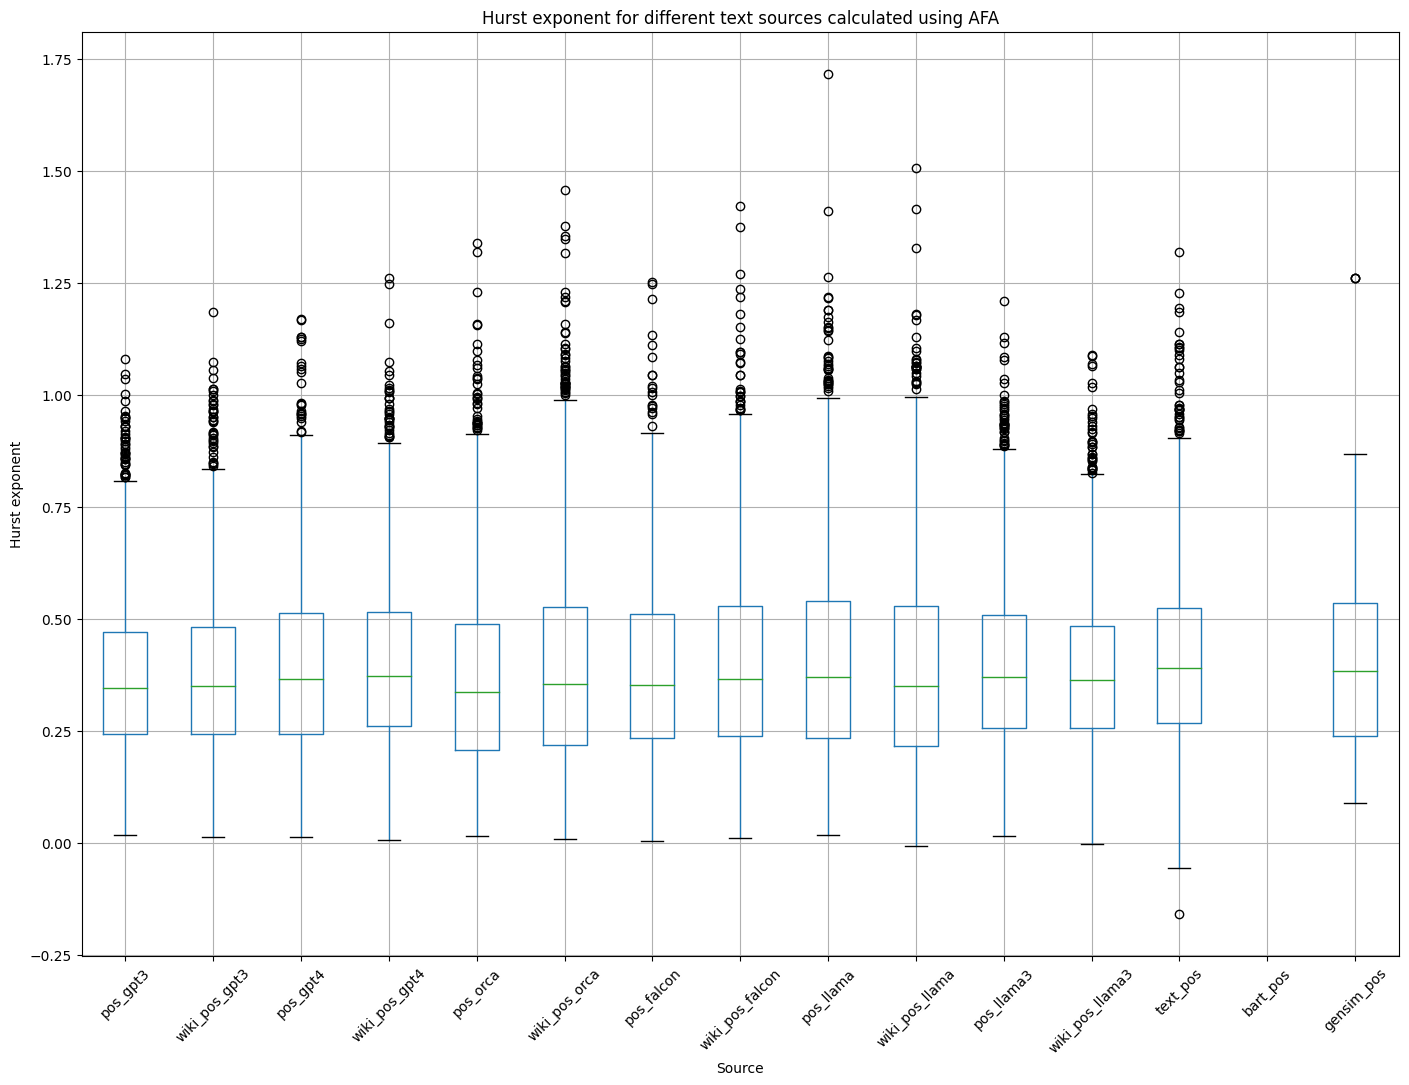

In [78]:
box_plot(h_df_afa, 'AFA')

RRA

In [79]:
from helpers.TimeSeries import normalize
from algorithms.RRA.RRA import perform_rra

def rra_calculate_cell(cell):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    its = construct_its(cell)
    ts_normalized = normalize(cell)
    estimated_h = perform_rra(its, ts_normalized)
    return estimated_h

In [80]:
h_df_filename_rra = 'h_df_rra.csv'

def load_or_create_h_df_filename_rra(pos_df_list):
    if os.path.exists(h_df_filename_rra):
        h_df = pd.read_csv(h_df_filename_rra)
    else:
        h_df = pos_df_list.applymap(rra_calculate_cell)   
        h_df.to_csv(h_df_filename_rra, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [81]:
h_df_rra = load_or_create_h_df_filename_rra(pos_df_list)
h_df_rra.info()
h_df_rra.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         2438 non-null   float64
 1   wiki_pos_gpt3    2438 non-null   float64
 2   pos_gpt4         2438 non-null   float64
 3   wiki_pos_gpt4    2438 non-null   float64
 4   pos_orca         2438 non-null   float64
 5   wiki_pos_orca    2435 non-null   float64
 6   pos_falcon       2432 non-null   float64
 7   wiki_pos_falcon  2438 non-null   float64
 8   pos_llama        2438 non-null   float64
 9   wiki_pos_llama   2438 non-null   float64
 10  pos_llama3       2438 non-null   float64
 11  wiki_pos_llama3  2438 non-null   float64
 12  text_pos         2438 non-null   float64
 13  bart_pos         2438 non-null   float64
 14  gensim_pos       2418 non-null   float64
dtypes: float64(15)
memory usage: 285.8 KB


,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,bart_pos,gensim_pos
0,0.568857,0.625814,0.648996,0.445265,0.577301,0.653786,0.574087,0.670758,0.462178,0.533370,0.615364,0.642561,0.574153,0.780939,0.618909
1,0.513762,0.454937,0.585142,0.487270,0.706383,0.619046,0.644570,0.590531,0.619429,0.660133,0.505824,0.502387,0.530692,0.667083,0.425842
2,0.625112,0.475646,0.616498,0.551816,0.608498,0.596052,0.632380,0.579613,0.614589,0.679210,0.525707,0.487209,0.763292,0.731614,0.808873
3,0.542602,0.506067,0.631895,0.608186,0.517663,0.553370,0.584186,0.622216,0.651382,0.449492,0.549626,0.597593,0.615652,0.533181,0.627242
4,0.517482,0.525610,0.547695,0.507761,0.653373,0.582894,0.580850,0.479076,0.557255,0.606849,0.500859,0.608339,0.714955,0.846917,NaN


In [82]:
outliers = find_outliers(h_df_rra, 2.5)
print_outliers(df, outliers)

Column pos_gpt3 outlier indices: []
Column pos_gpt3 outlier values pos: []
Column pos_gpt3 outlier values text: []
Column wiki_pos_gpt3 outlier indices: []
Column wiki_pos_gpt3 outlier values pos: []
Column wiki_pos_gpt3 outlier values text: []
Column pos_gpt4 outlier indices: []
Column pos_gpt4 outlier values pos: []
Column pos_gpt4 outlier values text: []
Column wiki_pos_gpt4 outlier indices: []
Column wiki_pos_gpt4 outlier values pos: []
Column wiki_pos_gpt4 outlier values text: []
Column pos_orca outlier indices: [443, 1279, 2085]
Column pos_orca outlier values pos: ['[1, 9, 4, 7, 1, 9, 2, 15, 9, 17, 14, 17]', '[13, 13, 4, 7, 1, 9, 17, 2, 7, 9, 2, 13, 14, 13, 14, 13]', '[7, 10, 1, 13, 13, 4, 7, 1, 9, 9, 17, 2, 13, 9, 2, 13, 9, 2, 13, 14, 13, 14, 7, 9, 17, 10, 9, 6, 10, 9, 2, 9, 14, 2, 7, 9, 9, 2, 16, 10, 14, 17, 2, 7, 13, 13, 14, 13, 13, 14, 14, 12, 4, 9, 2, 7, 13, 13, 13, 11, 1, 9, 2, 9, 14]']
Column pos_orca outlier values text: ['Developmental psychology is the scientific study 

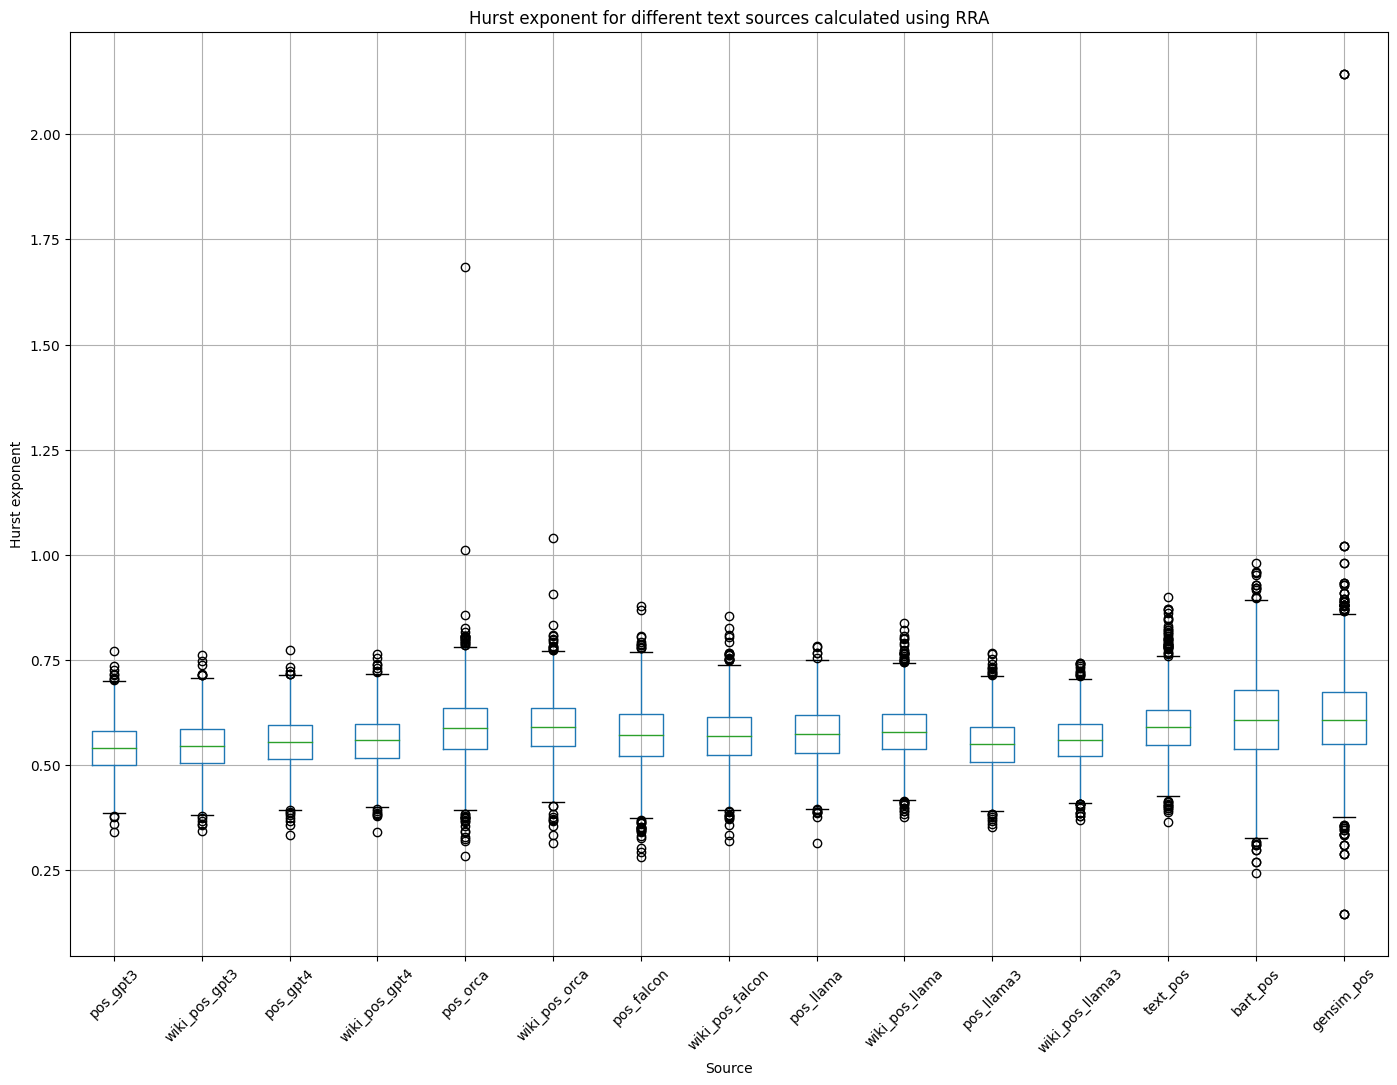

In [91]:
box_plot(h_df_rra, 'RRA')

Same as above but on combined cells

DFA

In [83]:
def merge_lists(pos_df_list):
    pos_df_list_combined = pd.DataFrame()
    for col in pos_df_list.columns:
        temp = []
        for cell_value in pos_df_list[col]:
            temp.extend(cell_value)
        pos_df_list_combined[col] = [temp]
    return pos_df_list_combined
        
pos_df_list_combined = merge_lists(pos_df_list)
pos_df_list_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pos_gpt3         1 non-null      object
 1   wiki_pos_gpt3    1 non-null      object
 2   pos_gpt4         1 non-null      object
 3   wiki_pos_gpt4    1 non-null      object
 4   pos_orca         1 non-null      object
 5   wiki_pos_orca    1 non-null      object
 6   pos_falcon       1 non-null      object
 7   wiki_pos_falcon  1 non-null      object
 8   pos_llama        1 non-null      object
 9   wiki_pos_llama   1 non-null      object
 10  pos_llama3       1 non-null      object
 11  wiki_pos_llama3  1 non-null      object
 12  text_pos         1 non-null      object
 13  bart_pos         1 non-null      object
 14  gensim_pos       1 non-null      object
dtypes: object(15)
memory usage: 248.0+ bytes


In [84]:
h_df_filename_dfa_combined = 'h_df_dfa_combined.csv'

def load_or_create_h_df_filename_dfa_combined(pos_df_list):
    if os.path.exists(h_df_filename_dfa_combined):
        h_df = pd.read_csv(h_df_filename_dfa_combined)
    else:
        h_df = pos_df_list.applymap(lambda x: dfa_calculate_cell(x, [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]))   
        h_df.to_csv(h_df_filename_dfa_combined, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [85]:
h_df_dfa_combined = load_or_create_h_df_filename_dfa_combined(pos_df_list_combined)
h_df_dfa_combined.info()
h_df_dfa_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         1 non-null      float64
 1   wiki_pos_gpt3    1 non-null      float64
 2   pos_gpt4         1 non-null      float64
 3   wiki_pos_gpt4    1 non-null      float64
 4   pos_orca         1 non-null      float64
 5   wiki_pos_orca    1 non-null      float64
 6   pos_falcon       1 non-null      float64
 7   wiki_pos_falcon  1 non-null      float64
 8   pos_llama        1 non-null      float64
 9   wiki_pos_llama   1 non-null      float64
 10  pos_llama3       1 non-null      float64
 11  wiki_pos_llama3  1 non-null      float64
 12  text_pos         1 non-null      float64
 13  bart_pos         1 non-null      float64
 14  gensim_pos       1 non-null      float64
dtypes: float64(15)
memory usage: 248.0 bytes


,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,bart_pos,gensim_pos
0,0.526773,0.532046,0.530236,0.545809,0.558871,0.56274,0.564194,0.5772,0.549374,0.555845,0.537951,0.552613,0.653857,0.561092,0.598791


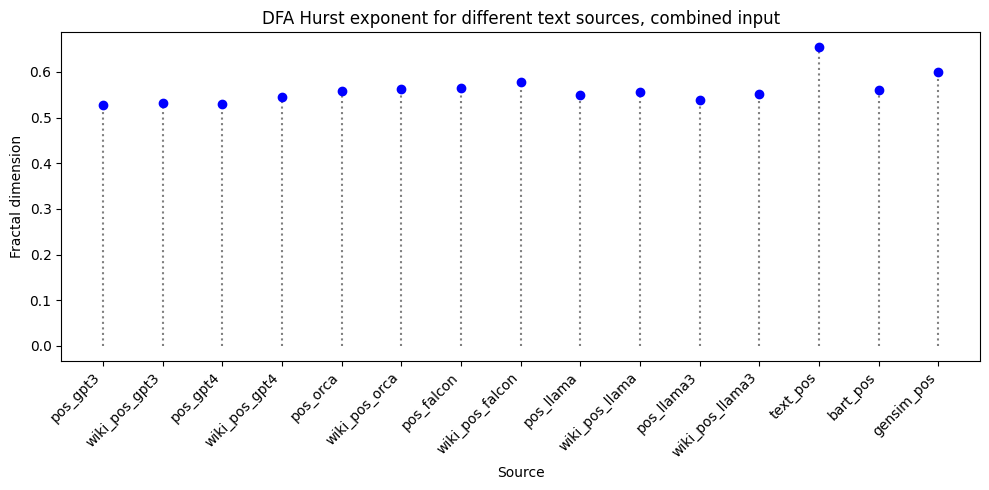

In [87]:
plot_scatter(h_df_dfa_combined.values.flatten().tolist(), pos_columns, 'DFA Hurst exponent for different text sources, combined input', 'DFA')

AFA

In [88]:
h_df_filename_afa_combined = 'h_df_afa_combined.csv'

def load_or_create_h_df_filename_afa_combined(pos_df_list):
    if os.path.exists(h_df_filename_afa_combined):
        h_df = pd.read_csv(h_df_filename_afa_combined)
    else:
        h_df = pos_df_list.applymap(lambda x: afa_calculate_cell(x, [100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 750, 800, 900, 1000, 1100, 1200]))   
        h_df.to_csv(h_df_filename_afa_combined, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [89]:
h_df_afa_combined = load_or_create_h_df_filename_afa_combined(pos_df_list_combined)
h_df_afa_combined.info()
h_df_afa_combined.head()

DataFrame created and saved to file.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         1 non-null      float64
 1   wiki_pos_gpt3    1 non-null      float64
 2   pos_gpt4         1 non-null      float64
 3   wiki_pos_gpt4    1 non-null      float64
 4   pos_orca         1 non-null      float64
 5   wiki_pos_orca    1 non-null      float64
 6   pos_falcon       1 non-null      float64
 7   wiki_pos_falcon  1 non-null      float64
 8   pos_llama        1 non-null      float64
 9   wiki_pos_llama   1 non-null      float64
 10  pos_llama3       1 non-null      float64
 11  wiki_pos_llama3  1 non-null      float64
 12  text_pos         1 non-null      float64
 13  bart_pos         1 non-null      float64
 14  gensim_pos       1 non-null      float64
dtypes: float64(15)
memory usage: 248.0 bytes


,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,bart_pos,gensim_pos
0,0.550915,0.554715,0.548271,0.563902,0.565994,0.569691,0.579708,0.596211,0.560389,0.571475,0.557569,0.580505,0.68399,0.560635,0.600161


In [ ]:
plot_scatter(h_df_afa_combined.values.flatten().tolist(), pos_columns, 'AFA Hurst exponent for different text sources, combined input', 'AFA')

RRA

In [ ]:
from helpers.TimeSeries import construct_its
import os

h_df_filename_rra_combined = 'h_df_rra_combined.csv'

def load_or_create_h_df_filename_rra_combined(pos_df_list):
    if os.path.exists(h_df_filename_rra_combined):
        h_df = pd.read_csv(h_df_filename_rra_combined)
    else:
        h_df = pos_df_list.applymap(rra_calculate_cell)   
        h_df.to_csv(h_df_filename_rra_combined, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [ ]:
h_df_rra_combined = load_or_create_h_df_filename_rra_combined(pos_df_list_combined)
h_df_rra_combined.info()
h_df_rra_combined.head()

In [ ]:
plot_scatter(h_df_rra_combined.values.flatten().tolist(), pos_columns, 'RRA Hurst exponent for different text sources, combined input', 'RRA')